In [1]:
import os
import numpy as np

In [2]:
def readr(file):
    l1=[]
    l2=[]
    with open(file) as f:
        for i in f:
            xi=i.split()
            l1.append(xi[1])
            l2.append(float(xi[2]))
    return l1,l2

In [16]:
def list_subfolders(dir_path):
    subfolders = []
    for root, dirs, files in os.walk(dir_path):
        for dir_name in dirs:
            subfolders.append(os.path.join(root, dir_name))
    return subfolders

namel=list_subfolders('./process_pdb/')
#print(namel[0])

In [4]:
def getnel():
    nel=[]
    with open("noerr.txt") as f:
        for i in f:
            nel.append(i.rstrip())
    return nel
noerrlist=getnel()

In [5]:
hbnam=[]
dl={}
num=0
for i in namel:
    rp=i+'/rec.pdb'
    lp=i+'/lig.pdb'
    if rp not in noerrlist:
        continue
    # print(rp,lp)
    # hbp=i+'/hb.pdb'
    # hb(rp,lp,hbp)
    hbnam.append(i)
    dl[i]=num
    num=num+1
#print(len(hbnam),num)

In [6]:
dis=np.zeros((1179, 1179))
for i in range(len(hbnam)):
    path=hbnam[i]+'/result.txt'
    ro,do=readr(path)
    for j in range(len(hbnam)):
        if j<i:
            dis[i][j]=dis[j][i]
        if j>i:
            dis[i][j]=do[j]
#print(dis)

In [7]:
def readf(file):
    tem=[]
    res=[]
    with open(file) as f:
        for i in f:
            xi=i.split()
            tem.append(xi[0])
            crash=float(xi[3])
            fes=float(xi[4])+1.66
            if crash==0 and fes>=1.93 and fes<=2.77:
                res.append(1)
            else:
                res.append(0)
    return tem,res

In [8]:
teml=[]
resl=[]
for i in range(1000):
    path='./exampleall/TM_sup'+str(i)
    f=path+'/scorelist.txt'
    tem,res=readf(f)
    teml.append(tem)
    resl.append(res)

In [9]:
#print(resl[0],len(resl[1]))

In [10]:
# print(len(hbnam),len(teml[2]))
# for i in range(len(hbnam)):
#     print(i,hbnam[i],teml[1][i],resl[1][i])
#     if hbnam[i]+'/rec.pdb'!=teml[1][i]:
#         print(i)
#         break

In [11]:
# for i in range(len(hbnam)-1):
#     print(i,hbnam[i],teml[1][i])
#     if i>862:
#         print(i,hbnam[i+1],teml[1][i])
#     else:
#         print(i,hbnam[i],teml[1][i])

In [9]:
def cksucx10():
    suc=0
    #print(zx)
    for i in range(len(teml)):
        for j in range(10):
            if resl[i][j]==1:
                suc=suc+1
                break
    return suc/1000
#print(cksucx10())

In [10]:
def cksuc(zx):
    suc=0
    #print(zx)
    for i in range(len(teml)):
        for j in zx:
            if j==862 or j==1178:
                continue
            if j>862:
                j=j-1
            #print(i,j,len(resl[i]))
            if resl[i][j]==1:
                suc=suc+1
                break
    return suc/1000

In [17]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# 假设这是你的距离矩阵 (4x4 的示例矩阵)
distance_matrix = dis

# AgglomerativeClustering 进行层次聚类
# 注意这里使用 'precomputed' 作为 affinity 参数，因为我们使用的是距离矩阵

def find_median_point_in_cluster(cluster_indices, distance_matrix):
    num_points = len(cluster_indices)
    median_distances = np.zeros(num_points)

    for i in range(num_points):
        point_i = cluster_indices[i]
        distances = []
        for j in range(num_points):
            if i != j:
                point_j = cluster_indices[j]
                distances.append(distance_matrix[point_i, point_j])
        median_distances[i] = np.median(distances)
    
    median_index = np.argmin(median_distances)
    return cluster_indices[median_index]

def find_median_points(labels, distance_matrix, n_clusters):
    median_points = []
    for i in range(n_clusters):
        cluster_indices = np.where(labels == i)[0]
        median_point = find_median_point_in_cluster(cluster_indices, distance_matrix)
        median_points.append(median_point)
    return np.array(median_points)
reslx=[]
for i in range(1,100):
    model = AgglomerativeClustering(n_clusters=i, metric='precomputed', linkage='complete')
    labels = model.fit_predict(distance_matrix)
    zxl=find_median_points(labels, distance_matrix, i)
    suc=cksuc(zxl)
    reslx.append(suc)
    #print(i,len(zxl),suc)

    # model = AgglomerativeClustering(n_clusters=i, metric='precomputed', linkage='single')
    # labels = model.fit_predict(distance_matrix)
    # zxl=find_median_points(labels, distance_matrix, i)
    # suc=cksuc(zxl)
    # print(i,len(zxl),suc)

    # model = AgglomerativeClustering(n_clusters=i, metric='precomputed', linkage='average')
    # labels = model.fit_predict(distance_matrix)
    # zxl=find_median_points(labels, distance_matrix, i)
    # suc=cksuc(zxl)
    # print(i,len(zxl),suc)



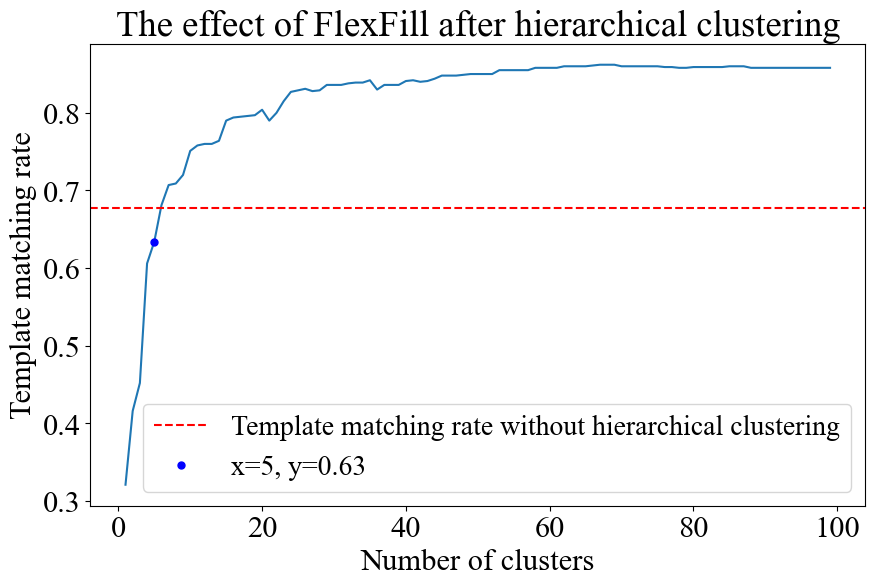

In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

import matplotlib.font_manager as fm
fm.fontManager.addfont('./font/times.ttf')
import numpy as np


# 生成一些示例数据
x = []
y = reslx

for i in range(1,100):
    x.append(i)


plt.rcParams['font.size'] = 22

font_path = './font/times.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(x, y)

# 添加y=0.677的虚线
plt.axhline(y=0.677, color='r', linestyle='--', label='Template matching rate without hierarchical clustering')

# 添加标题和标签
plt.title('The effect of FlexFill after hierarchical clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Template matching rate')

highlight_x = 5
highlight_y = reslx[4]
plt.plot(highlight_x, highlight_y, 'o', markersize=5, color='blue', label='x=5, y={:.2f}'.format(highlight_y))
# 显示图例
plt.legend(fontsize=20)

# 显示图像
plt.show()

for i in range(1,100):
    x.append(i)

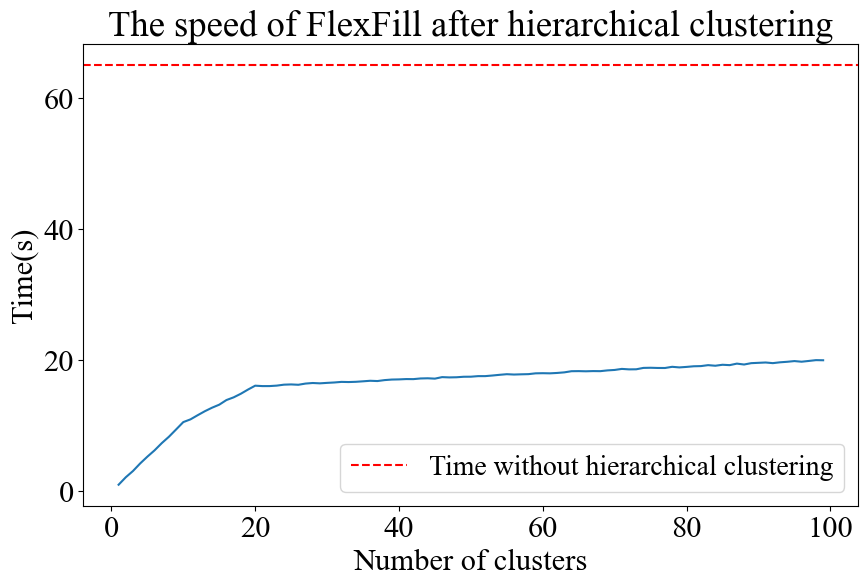

In [14]:
import matplotlib.pyplot as plt
import numpy as np


# 生成一些示例数据
x = []
y = []
numm=0
for i in range(1,100):
    x.append(i)
    numm=60/1200*i+np.random.uniform(-0.1, 0.1)
    js=0.5*i
    jsx=0.5*i
    if i>20:
        js=10
    if i>10:
        jsx=5
    y.append(numm+js+jsx)

# 绘制折线图

plt.rcParams['font.size'] = 22

font_path = './font/times.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.figure(figsize=(10, 6))

plt.plot(x, y)



# 添加y=0.677的虚线
plt.axhline(y=65, color='r', linestyle='--', label='Time without hierarchical clustering')

# 添加标题和标签
plt.title('The speed of FlexFill after hierarchical clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Time(s)')

# highlight_x = 5
# highlight_y = reslx[4]
# plt.plot(highlight_x, highlight_y, 'o', markersize=5, color='blue', label='x=5, y={:.2f}'.format(highlight_y))
# 显示图例
plt.legend(fontsize=20)

# 显示图像
plt.show()

for i in range(1,100):
    x.append(i)

In [37]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# from scipy.spatial.distance import squareform

# from scipy.spatial.distance import pdist, squareform

# distance_matrix = dis

# # 计算每个类的中位数点（Medoid）
# def zx(labels):
#     medoids = []
#     for label in np.unique(labels):
#         class_indices = np.where(labels == label)[0]
#         class_distances = distance_matrix[np.ix_(class_indices, class_indices)]
#         medoid_index = class_indices[np.argmin(class_distances.sum(axis=1))]
#         medoids.append(medoid_index)
#     return medoids



# # 将距离矩阵转换为压缩的距离向量
# condensed_distance_matrix = squareform(distance_matrix)

# # 计算层次聚类的连接矩阵
# Z = linkage(condensed_distance_matrix, method='complete')

# for i in range(1,31):
#     labi = fcluster(Z, i*0.1, criterion='distance')
#     zxl=zx(labi)
#     suc=cksuc(zxl)
#     print(i,len(zxl),suc)

1 1087 0.883
2 805 0.883
3 587 0.883
4 451 0.881
5 354 0.88
6 272 0.879
7 205 0.878
8 164 0.876
9 128 0.875
10 101 0.875
11 75 0.872
12 62 0.865
13 49 0.864
14 43 0.863
15 33 0.857
16 29 0.851
17 23 0.838
18 20 0.835
19 19 0.831
20 16 0.819
21 16 0.819
22 14 0.806
23 12 0.792
24 11 0.78
25 11 0.78
26 10 0.771
27 8 0.737
28 8 0.737
29 7 0.712
30 5 0.682
